### 1. Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- Regresión polinómica no lineal con grados del 2 al 10. ¿El score se estanca a partir de cierto grado?
- SVR

In [ ]:
import pandas as pd

df = pd.read_csv('/Users/rochi/Desktop/TestFolder/DataScienceBootCampMIO/ProjectsDS/Week9/day1/data/USA_Housing.csv')
df

### 2. Se pide:

En el anterior dataset, la columna "Avg. Area Number of Bedrooms" está en un rango numérico limitado:

1. Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

2. Cuando lo hayas hecho, tendras una columna con números enteros en un rango limitado. Ahora trata a esa columna como una serie de valores discretos (classes, labels). 

3. Usando las demás columnas numéricas y una a una, utiliza SVM para clasificar esa columna modificada.

4. Usando todas las demás columnas a la vez, utiliza SVM para clasificar esa columna modificada. Es decir, "Avg. Area Income" con nuestro target, después "Avg. Area House Age", ...  

5. ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target? 

6. Utilizar todas las columnas a la vez para clasificar "Avg. Area Number of Bedrooms", ¿hace aumentar el score? ¿por qué?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# la otra forma, pero lo mismo: from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,8)
# Load libraries

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

# progress bar 
from tqdm import tqdm

In [305]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [306]:
df1 = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population', 'Price']].astype(int)
df1

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0                79545                    5                          7   
1                79248                    6                          6   
2                61287                    5                          8   
3                63345                    7                          5   
4                59982                    5                          7   
...                ...                  ...                        ...   
4995             60567                    7                          6   
4996             78491                    6                          6   
4997             63390                    7                          4   
4998             68001                    5                          7   
4999             65510                    5                          6   

      Avg. Area Number of Bedrooms  Area Population    Price  
0                                4            23086  1059033  
1                                3            40173  1505890  
2                                5            36882  1058987  
3                                3            34310  1260616  
4                                4            26354   630943  
...                            ...              ...      ...  
4995                             3            22837  1060193  
4996                             4            25616  1482617  
4997                             2            33266  1030729  
4998                             5            42625  1198656  
4999                             4            46501  1298950  

[5000 rows x 6 columns]

Realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

Regresión polinómica no lineal con grados del 2 al 10. 
¿El score se estanca a partir de cierto grado?

SVR

In [307]:
df1.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [308]:
X = df1
X

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0                79545                    5                          7   
1                79248                    6                          6   
2                61287                    5                          8   
3                63345                    7                          5   
4                59982                    5                          7   
...                ...                  ...                        ...   
4995             60567                    7                          6   
4996             78491                    6                          6   
4997             63390                    7                          4   
4998             68001                    5                          7   
4999             65510                    5                          6   

      Avg. Area Number of Bedrooms  Area Population    Price  
0                                4            23086  1059033  
1                                3            40173  1505890  
2                                5            36882  1058987  
3                                3            34310  1260616  
4                                4            26354   630943  
...                            ...              ...      ...  
4995                             3            22837  1060193  
4996                             4            25616  1482617  
4997                             2            33266  1030729  
4998                             5            42625  1198656  
4999                             4            46501  1298950  

[5000 rows x 6 columns]

In [309]:
X_train = df1.drop(df1[['Price']], 1)
y_train = df1[['Price']]

In [310]:
X_train.shape

(5000, 5)

In [311]:
y_train.shape

(5000, 1)

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X_train.values, y_train.values,test_size=0.2)

In [313]:
y_train.shape

(4000, 1)

In [314]:
#regresion no lineal = POLINOMICA
degree = 5
polinominal_model = PolynomialFeatures(degree)

In [315]:
X_poly = polinominal_model.fit_transform(X_train, y_train)
#######
print(X_poly)
print(X_poly.shape)

[[1.00000000e+00 7.53980000e+04 5.00000000e+00 ... 1.21133505e+15
  1.28110795e+19 1.35489976e+23]
 [1.00000000e+00 6.90910000e+04 7.00000000e+00 ... 8.74706072e+14
  5.72180230e+18 3.74285976e+22]
 [1.00000000e+00 5.82290000e+04 4.00000000e+00 ... 2.27387515e+15
  2.04521426e+19 1.83954751e+23]
 ...
 [1.00000000e+00 5.81980000e+04 4.00000000e+00 ... 4.60647158e+13
  1.63829162e+17 5.82658413e+20]
 [1.00000000e+00 7.06070000e+04 6.00000000e+00 ... 1.82902387e+15
  3.58446001e+19 7.02470525e+23]
 [1.00000000e+00 6.89530000e+04 5.00000000e+00 ... 8.80423399e+12
  5.72627378e+16 3.72436847e+20]]
(4000, 252)


In [316]:
X_poly.shape

(4000, 252)

In [317]:
y_train.shape

(4000, 1)

In [318]:
model = LinearRegression()
model.fit(X_poly, y_train)

LinearRegression()

In [319]:
y_pred = model.predict(X_poly)
y_pred

array([[1245704.71999493],
       [1488862.43761944],
       [ 971478.52593857],
       ...,
       [ 334560.13364134],
       [1438889.42461118],
       [ 775189.16894204]])

In [320]:
X_test_poly = polinominal_model.fit_transform(X_test.reshape(-1, 1))

In [321]:
X_test_poly.shape

(5000, 6)

In [322]:
y_test_pred.shape

(5000, 6)

In [323]:
print("X_test\n", X_test)
print("X_test_poly\n", X_test_poly)
print("y_test_pred\n", y_test_pred)

X_test
 [[68929     7     6     3   172]
 [80613     4     7     5 35692]
 [77905     5     7     6 29282]
 ...
 [54474     6     7     4 21409]
 [73279     5     8     3 13981]
 [94392     7     8     6 41462]]
X_test_poly
 [[1.00000000e+00 6.89290000e+04 4.75120704e+09 3.27495950e+14
  2.25739683e+19 1.55600106e+24]
 [1.00000000e+00 7.00000000e+00 4.90000000e+01 3.43000000e+02
  2.40100000e+03 1.68070000e+04]
 [1.00000000e+00 6.00000000e+00 3.60000000e+01 2.16000000e+02
  1.29600000e+03 7.77600000e+03]
 ...
 [1.00000000e+00 8.00000000e+00 6.40000000e+01 5.12000000e+02
  4.09600000e+03 3.27680000e+04]
 [1.00000000e+00 6.00000000e+00 3.60000000e+01 2.16000000e+02
  1.29600000e+03 7.77600000e+03]
 [1.00000000e+00 4.14620000e+04 1.71909744e+09 7.12772182e+13
  2.95529602e+18 1.22532484e+23]]
y_test_pred
 [[1.00000000e+00 6.17830000e+04 3.81713909e+09 2.35834304e+14
  1.45705508e+19 9.00212342e+23]
 [1.00000000e+00 6.00000000e+00 3.60000000e+01 2.16000000e+02
  1.29600000e+03 7.77600000e+

In [324]:
print("Score:", r2_score(y_train, y_pred))

Score: 0.8936004827812083


In [325]:
y_test_pred.shape

(5000, 6)

In [326]:
model.score(X_test_poly, y_test_pred)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 252 is different from 6)

In [327]:
mean_absolute_error(y_true=y_test, y_pred=y_test_pred)

ValueError: Found input variables with inconsistent numbers of samples: [1000, 5000]

In [328]:
#to predict
X_test_poly = polinominal_model.fit_transform(X_test.reshape(-1, 1))
y_test_pred = X_test_poly = model.fit_transform(X_test.reshape(-1, 1))
y_test_pred = model.predict(X_test_poly)

print("X_test\n", X_test)
print("X_test_poly\n", X_test_poly)
print("y_test_pred\n", y_test_pred)

AttributeError: 'LinearRegression' object has no attribute 'fit_transform'

In [329]:
X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='b')
X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(X_train_to_show, y_pred, color='red')
plt.scatter(X_train_to_show, y_pred, color='red')
plt.title("Poninominal degree " + str(degree))
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [330]:
degree_min = 2
degree_max = 8
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1),y_train)

    #######
    print(X_poly)
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))

    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Poninominal degree " + str(degree))
    plt.show()

################
[[1.00000000e+00 7.53980000e+04 5.68485840e+09]
 [1.00000000e+00 5.00000000e+00 2.50000000e+01]
 [1.00000000e+00 5.00000000e+00 2.50000000e+01]
 ...
 [1.00000000e+00 6.00000000e+00 3.60000000e+01]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00]
 [1.00000000e+00 1.30080000e+04 1.69208064e+08]]
(20000, 3)


ValueError: Found input variables with inconsistent numbers of samples: [20000, 4000]

In [331]:
x = df["Avg. Area Income"].values
y = df["Price"].values

X_train, X_test, y_train, y_test = train_test_split(df['Avg. Area Income'].values, df['Price'].values,test_size=0.2)
degree_min = 2
degree_max = 10
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1),y_train)
    #######
    print(X_poly)
    print(X_poly.shape)
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)
    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Poninominal degree " + str(de3gree))
    plt.show()

################
[[1.00000000e+00 3.81225245e+04 1.45332687e+09]
 [1.00000000e+00 6.71437505e+04 4.50828323e+09]
 [1.00000000e+00 7.74857107e+04 6.00403536e+09]
 ...
 [1.00000000e+00 7.59514525e+04 5.76862314e+09]
 [1.00000000e+00 6.10883936e+04 3.73179183e+09]
 [1.00000000e+00 7.75281230e+04 6.01060986e+09]]
(4000, 3)
y_pred (4000,)
Score: 0.40301135527897536


NameError: name 'de3gree' is not defined

In [332]:
8:12
Respuesta : El score se mantiene preferentemente en 0.40 , oscila entre 0,407 y 0,404 ó 0,403. Hasta el último 'degree' que desciende a 0,39
8:12
según lo que m dió a mi
8:13
y lo mismo hice con cada una de las continuas
8:13
Vuelvo a entrenar el modelo, pasandolé una nueva columna de X
8:13


SyntaxError: invalid syntax (<ipython-input-332-b54d5143dad0>, line 2)

################
[[ 1.          3.90709037 15.26535514]
 [ 1.          6.41200772 41.11384295]
 [ 1.          5.73137766 32.84868983]
 ...
 [ 1.          6.58368518 43.34491056]
 [ 1.          4.31660642 18.63309099]
 [ 1.          6.71637558 45.10970099]]
(4000, 3)
y_pred (4000,)
Score: 0.198634831568695


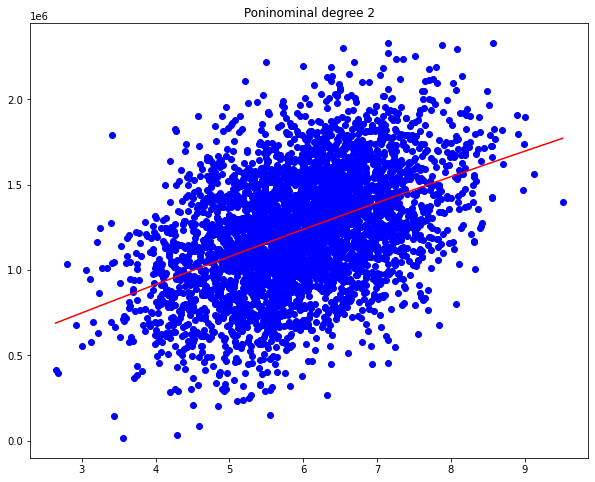

################
[[  1.           3.90709037  15.26535514  59.643122  ]
 [  1.           6.41200772  41.11384295 263.62227822]
 [  1.           5.73137766  32.84868983 188.26824689]
 ...
 [  1.           6.58368518  43.34491056 285.36924534]
 [  1.           4.31660642  18.63309099  80.43172022]
 [  1.           6.71637558  45.10970099 302.97369433]]
(4000, 4)
y_pred (4000,)
Score: 0.19878584275868516


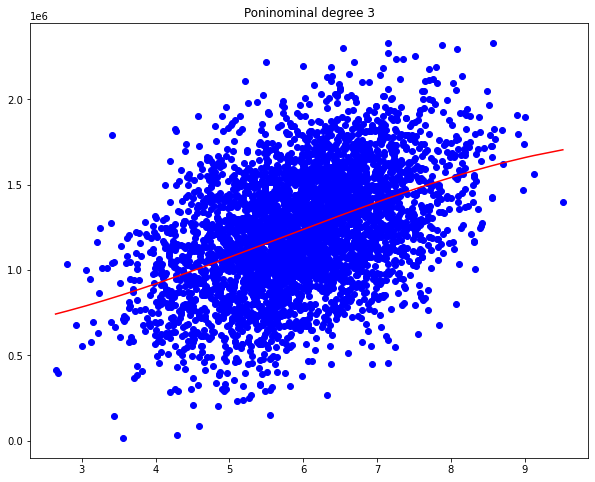

################
[[1.00000000e+00 3.90709037e+00 1.52653551e+01 5.96431220e+01
  2.33031067e+02]
 [1.00000000e+00 6.41200772e+00 4.11138429e+01 2.63622278e+02
  1.69034808e+03]
 [1.00000000e+00 5.73137766e+00 3.28486898e+01 1.88268247e+02
  1.07903642e+03]
 ...
 [1.00000000e+00 6.58368518e+00 4.33449106e+01 2.85369245e+02
  1.87878127e+03]
 [1.00000000e+00 4.31660642e+00 1.86330910e+01 8.04317202e+01
  3.47192080e+02]
 [1.00000000e+00 6.71637558e+00 4.51097010e+01 3.02973694e+02
  2.03488512e+03]]
(4000, 5)
y_pred (4000,)
Score: 0.19878840164647082


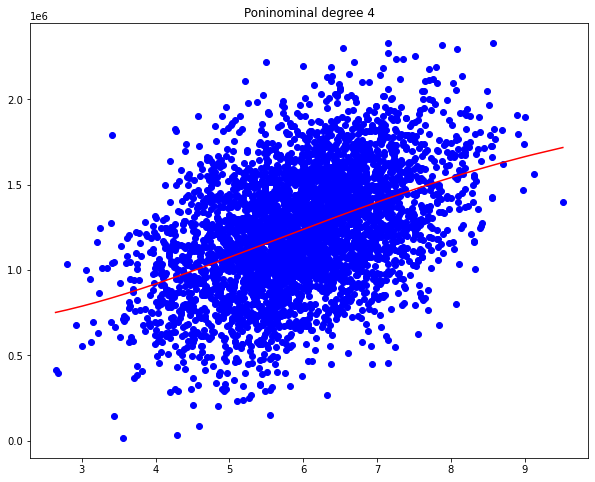

################
[[1.00000000e+00 3.90709037e+00 1.52653551e+01 5.96431220e+01
  2.33031067e+02 9.10473439e+02]
 [1.00000000e+00 6.41200772e+00 4.11138429e+01 2.63622278e+02
  1.69034808e+03 1.08385249e+04]
 [1.00000000e+00 5.73137766e+00 3.28486898e+01 1.88268247e+02
  1.07903642e+03 6.18436525e+03]
 ...
 [1.00000000e+00 6.58368518e+00 4.33449106e+01 2.85369245e+02
  1.87878127e+03 1.23693044e+04]
 [1.00000000e+00 4.31660642e+00 1.86330910e+01 8.04317202e+01
  3.47192080e+02 1.49869156e+03]
 [1.00000000e+00 6.71637558e+00 4.51097010e+01 3.02973694e+02
  2.03488512e+03 1.36670528e+04]]
(4000, 6)
y_pred (4000,)
Score: 0.19904760923958464


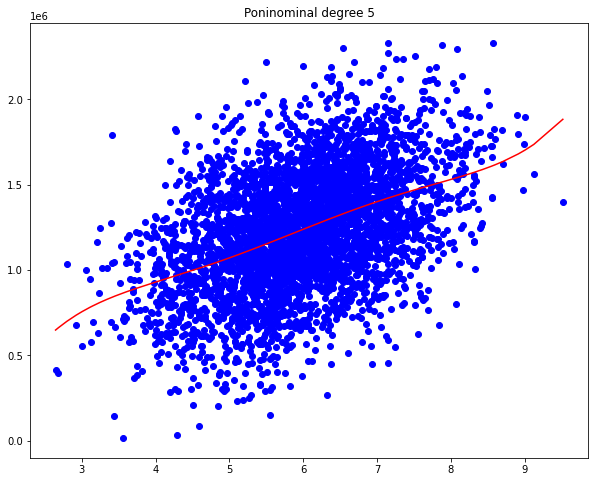

################
[[1.00000000e+00 3.90709037e+00 1.52653551e+01 ... 2.33031067e+02
  9.10473439e+02 3.55730200e+03]
 [1.00000000e+00 6.41200772e+00 4.11138429e+01 ... 1.69034808e+03
  1.08385249e+04 6.94967056e+04]
 [1.00000000e+00 5.73137766e+00 3.28486898e+01 ... 1.07903642e+03
  6.18436525e+03 3.54449328e+04]
 ...
 [1.00000000e+00 6.58368518e+00 4.33449106e+01 ... 1.87878127e+03
  1.23693044e+04 8.14356062e+04]
 [1.00000000e+00 4.31660642e+00 1.86330910e+01 ... 3.47192080e+02
  1.49869156e+03 6.46926162e+03]
 [1.00000000e+00 6.71637558e+00 4.51097010e+01 ... 2.03488512e+03
  1.36670528e+04 9.17930595e+04]]
(4000, 7)
y_pred (4000,)
Score: 0.19954267641368995


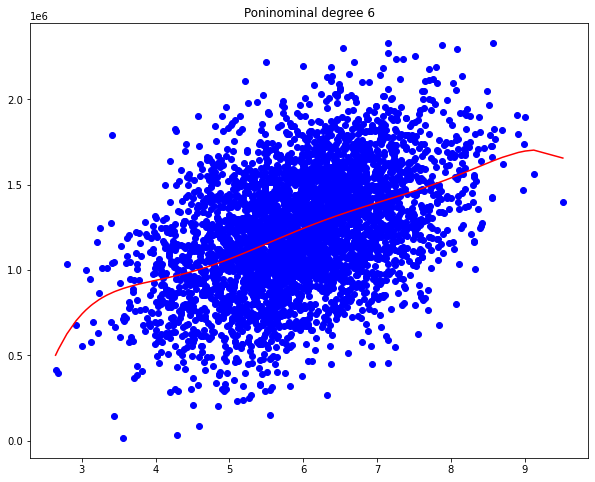

################
[[1.00000000e+00 3.90709037e+00 1.52653551e+01 ... 9.10473439e+02
  3.55730200e+03 1.38987004e+04]
 [1.00000000e+00 6.41200772e+00 4.11138429e+01 ... 1.08385249e+04
  6.94967056e+04 4.45613412e+05]
 [1.00000000e+00 5.73137766e+00 3.28486898e+01 ... 6.18436525e+03
  3.54449328e+04 2.03148296e+05]
 ...
 [1.00000000e+00 6.58368518e+00 4.33449106e+01 ... 1.23693044e+04
  8.14356062e+04 5.36146394e+05]
 [1.00000000e+00 4.31660642e+00 1.86330910e+01 ... 1.49869156e+03
  6.46926162e+03 2.79252562e+04]
 [1.00000000e+00 6.71637558e+00 4.51097010e+01 ... 1.36670528e+04
  9.17930595e+04 6.16516663e+05]]
(4000, 8)
y_pred (4000,)
Score: 0.20052514789079223


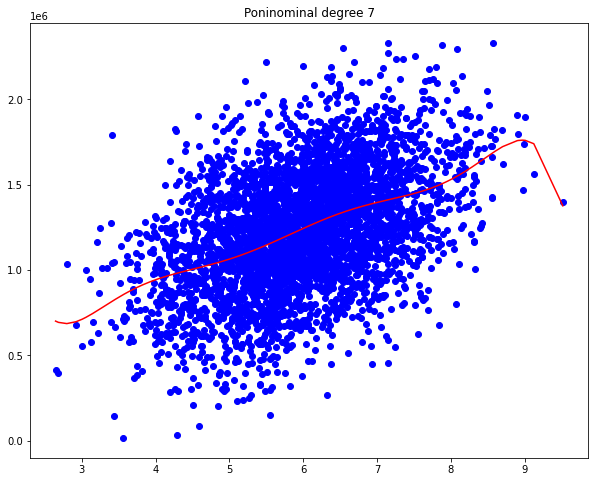

################
[[1.00000000e+00 3.90709037e+00 1.52653551e+01 ... 3.55730200e+03
  1.38987004e+04 5.43034784e+04]
 [1.00000000e+00 6.41200772e+00 4.11138429e+01 ... 6.94967056e+04
  4.45613412e+05 2.85727664e+06]
 [1.00000000e+00 5.73137766e+00 3.28486898e+01 ... 3.54449328e+04
  2.03148296e+05 1.16431960e+06]
 ...
 [1.00000000e+00 6.58368518e+00 4.33449106e+01 ... 8.14356062e+04
  5.36146394e+05 3.52981907e+06]
 [1.00000000e+00 4.31660642e+00 1.86330910e+01 ... 6.46926162e+03
  2.79252562e+04 1.20542340e+05]
 [1.00000000e+00 6.71637558e+00 4.51097010e+01 ... 9.17930595e+04
  6.16516663e+05 4.14075746e+06]]
(4000, 9)
y_pred (4000,)
Score: 0.20092412820509664


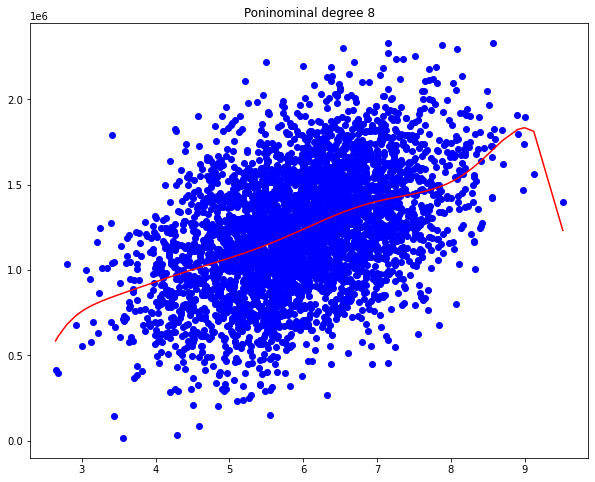

################
[[1.00000000e+00 3.90709037e+00 1.52653551e+01 ... 1.38987004e+04
  5.43034784e+04 2.12168597e+05]
 [1.00000000e+00 6.41200772e+00 4.11138429e+01 ... 4.45613412e+05
  2.85727664e+06 1.83208799e+07]
 [1.00000000e+00 5.73137766e+00 3.28486898e+01 ... 2.03148296e+05
  1.16431960e+06 6.67315536e+06]
 ...
 [1.00000000e+00 6.58368518e+00 4.33449106e+01 ... 5.36146394e+05
  3.52981907e+06 2.32392175e+07]
 [1.00000000e+00 4.31660642e+00 1.86330910e+01 ... 2.79252562e+04
  1.20542340e+05 5.20333840e+05]
 [1.00000000e+00 6.71637558e+00 4.51097010e+01 ... 6.16516663e+05
  4.14075746e+06 2.78108823e+07]]
(4000, 10)
y_pred (4000,)
Score: 0.2025402170900943


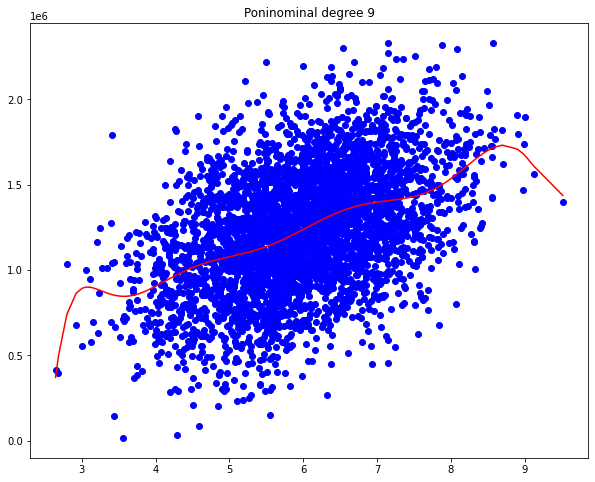

################
[[1.00000000e+00 3.90709037e+00 1.52653551e+01 ... 5.43034784e+04
  2.12168597e+05 8.28961883e+05]
 [1.00000000e+00 6.41200772e+00 4.11138429e+01 ... 2.85727664e+06
  1.83208799e+07 1.17473623e+08]
 [1.00000000e+00 5.73137766e+00 3.28486898e+01 ... 1.16431960e+06
  6.67315536e+06 3.82463735e+07]
 ...
 [1.00000000e+00 6.58368518e+00 4.33449106e+01 ... 3.52981907e+06
  2.32392175e+07 1.52999692e+08]
 [1.00000000e+00 4.31660642e+00 1.86330910e+01 ... 1.20542340e+05
  5.20333840e+05 2.24607640e+06]
 [1.00000000e+00 6.71637558e+00 4.51097010e+01 ... 4.14075746e+06
  2.78108823e+07 1.86788331e+08]]
(4000, 11)
y_pred (4000,)
Score: 0.20260459812206144


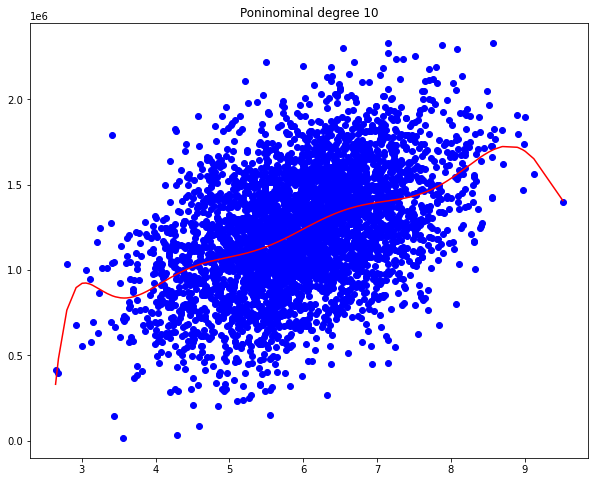

In [333]:
X_train, X_test, y_train, y_test = train_test_split(df['Avg. Area House Age'].values, df['Price'].values,test_size=0.2)

degree_min = 2
degree_max = 10
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1),y_train)
    #######
    print(X_poly)
    print(X_poly.shape)
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)
    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Poninominal degree " + str(degree))
    plt.show()

In [334]:
#SVR